In [1]:
from spatial_transcriptome_spm import spatial_normalization, mol2imgs, get_corr_map
import matplotlib.pyplot as plt
import numpy as np

/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/dipy/viz/__init__.py:31: UserWarning: You do not have FURY installed. Some visualization functions might not work for you. For installation instructions, please visit: https://fury.gl/
  warnings.warn(


In [2]:
tissue_dirs= ['./Buzzi_HemeHpx/sham/', 
              './Buzzi_HemeHpx/heme_0030/', 
              './Buzzi_HemeHpx/heme_0125/', 
              './Buzzi_HemeHpx/heme_0500/', 
              './Buzzi_HemeHpx/heme_1000/']
metafile = None

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of HVGs: 208
{'spot_diameter_fullres': 54.01709099611886, 'tissue_hires_scalef': 0.26838434, 'fiducial_diameter_fullres': 87.25837776296125, 'tissue_lowres_scalef': 0.080515295}
{'spot_diameter_fullres': 54.186495964866666, 'tissue_hires_scalef': 0.26766595, 'fiducial_diameter_fullres': 87.53203194324615, 'tissue_lowres_scalef': 0.08029979}
{'spot_diameter_fullres': 53.938834559710955, 'tissue_hires_scalef': 0.23022908, 'fiducial_diameter_fullres': 87.13196351953309, 'tissue_lowres_scalef': 0.06906872}
{'spot_diameter_fullres': 54.03147307927118, 'tissue_hires_scalef': 0.23940627, 'fiducial_diameter_fullres': 87.28161035882268, 'tissue_lowres_scalef': 0.07182188}
{'spot_diameter_fullres': 53.9713283437421, 'tissue_hires_scalef': 0.24148756, 'fiducial_diameter_fullres': 87.18445347835262, 'tissue_lowres_scalef': 0.07244627}


/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

COM matching Done
1.6525608655470403
Rigid Transform Done
1.5521274720373506
Affine Registration Done
COM matching Done
0.7324943521174475
Rigid Transform Done
0.7548103518057288
Affine Registration Done
COM matching Done
0.5327089063585058
Rigid Transform Done
0.5929786256890998
Affine Registration Done
COM matching Done
0.6003328585268352
Rigid Transform Done
0.6644691678805259
Affine Registration Done
COM matching Done
0.6701707424120696
Rigid Transform Done
0.7586755160355756
Affine Registration Done


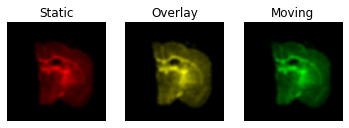

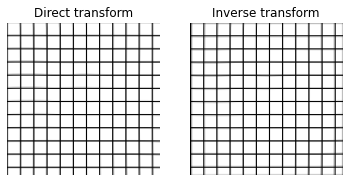

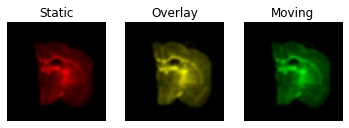

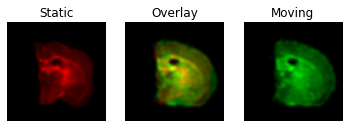

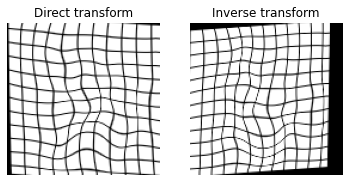

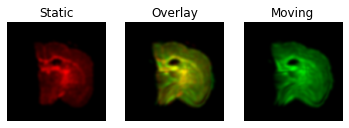

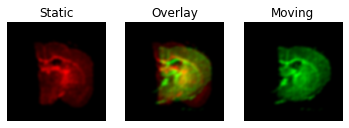

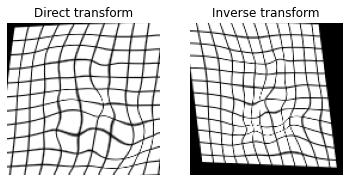

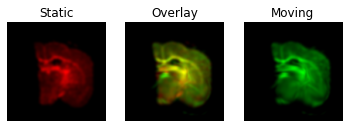

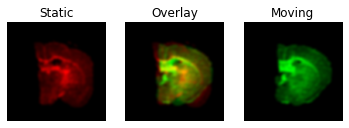

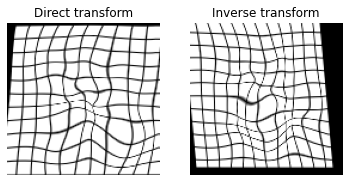

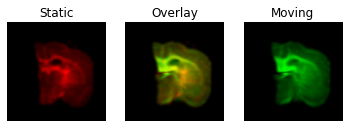

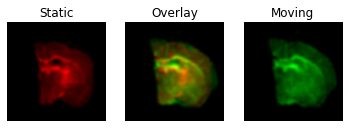

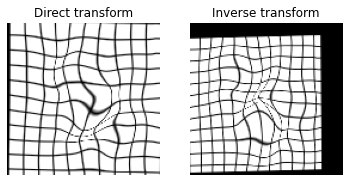

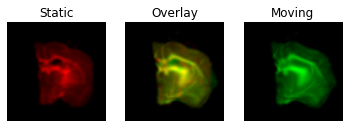

In [3]:
im_alls_s, adatas, tsimgs, ts_meta_coords_, imscales, spotdists, mapping_all = spatial_normalization(tissue_dirs,
                                                                                sel_no = None,
                                                                                tsimg_output= (600,600),
                                                                                targetsize = (128,128),
                                                                                truncate = 3,
                                                                                alpha= 0.01,
                                                                                idx_ref=  0,
                                                                                verbose =0 )

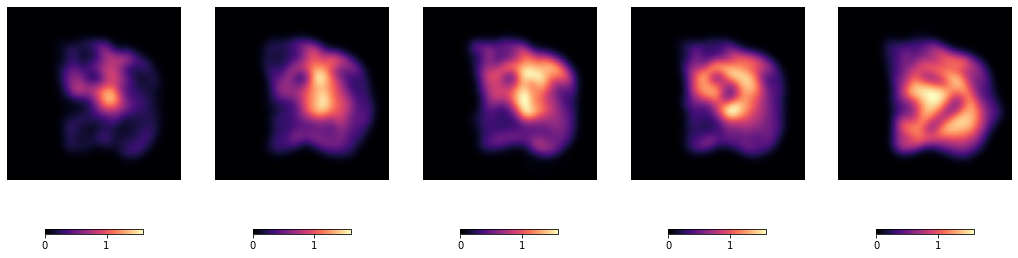

In [4]:
molimgs= mol2imgs(adatas, tsimgs,ts_meta_coords_,imscales,spotdists,
                 mapping_all,'Gfap',
                 truncate = 3, alpha=0.01,
                 sigma=4, tsimg_output=(600,600), targetsize=(128,128),
                 visualize = 1)

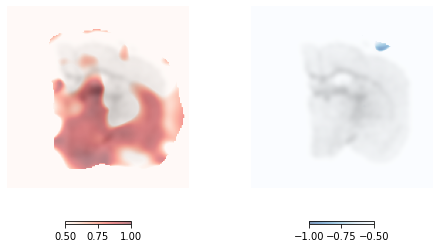

In [5]:
hemeparam = [0,30,125,500,1000]
imgs_rmap, imgs_pmap= get_corr_map(molimgs, hemeparam, im_alls_s[0],
                                   threshold = 0.05,
                                method='pearson', visualize=1, verbose=0)

### Pixelwise test for all(hvg) genes

In [6]:
hvg_list = []
for adata in adatas:
    hvg_list.extend(adata.var.index[adata.var.highly_variable].tolist())

hvg_genes_all= list(set(hvg_list))
hvg_sel =[]
sel_no = len(adatas)
for ii in hvg_genes_all:
    c= hvg_list.count(ii)
    if c >= sel_no:
        hvg_sel.append(ii)
print('Number of HVGs:', len(hvg_sel))

Number of HVGs: 208


In [7]:
# Test for ALL gene features ### 
imgs_rmaps = []
imgs_pmaps = []
for e, gg in enumerate(hvg_sel):
    molimgs= mol2imgs(adatas, tsimgs,ts_meta_coords_,imscales,spotdists,
                     mapping_all,gg,
                     truncate = 3, alpha=0.01,
                     sigma=4, tsimg_output=(600,600), targetsize=(128,128),
                     visualize = 0)
    imgs_rmap, imgs_pmap= get_corr_map(molimgs, hemeparam, im_alls_s[0],
                                   threshold = 0.05,
                                    method='pearson', visualize=0,verbose=0)
    imgs_rmaps.append(imgs_rmap)
    imgs_pmaps.append(imgs_pmap)
    if e%100==0: print(e+1)
        

1
101
201


In [8]:
len(imgs_rmaps)


208

In [9]:
abs_rs = [np.mean(gg[gg>0.3]) for gg in imgs_rmaps]

In [10]:
abs_idx = sorted(range(len(abs_rs)), key=abs_rs.__getitem__, reverse=True)

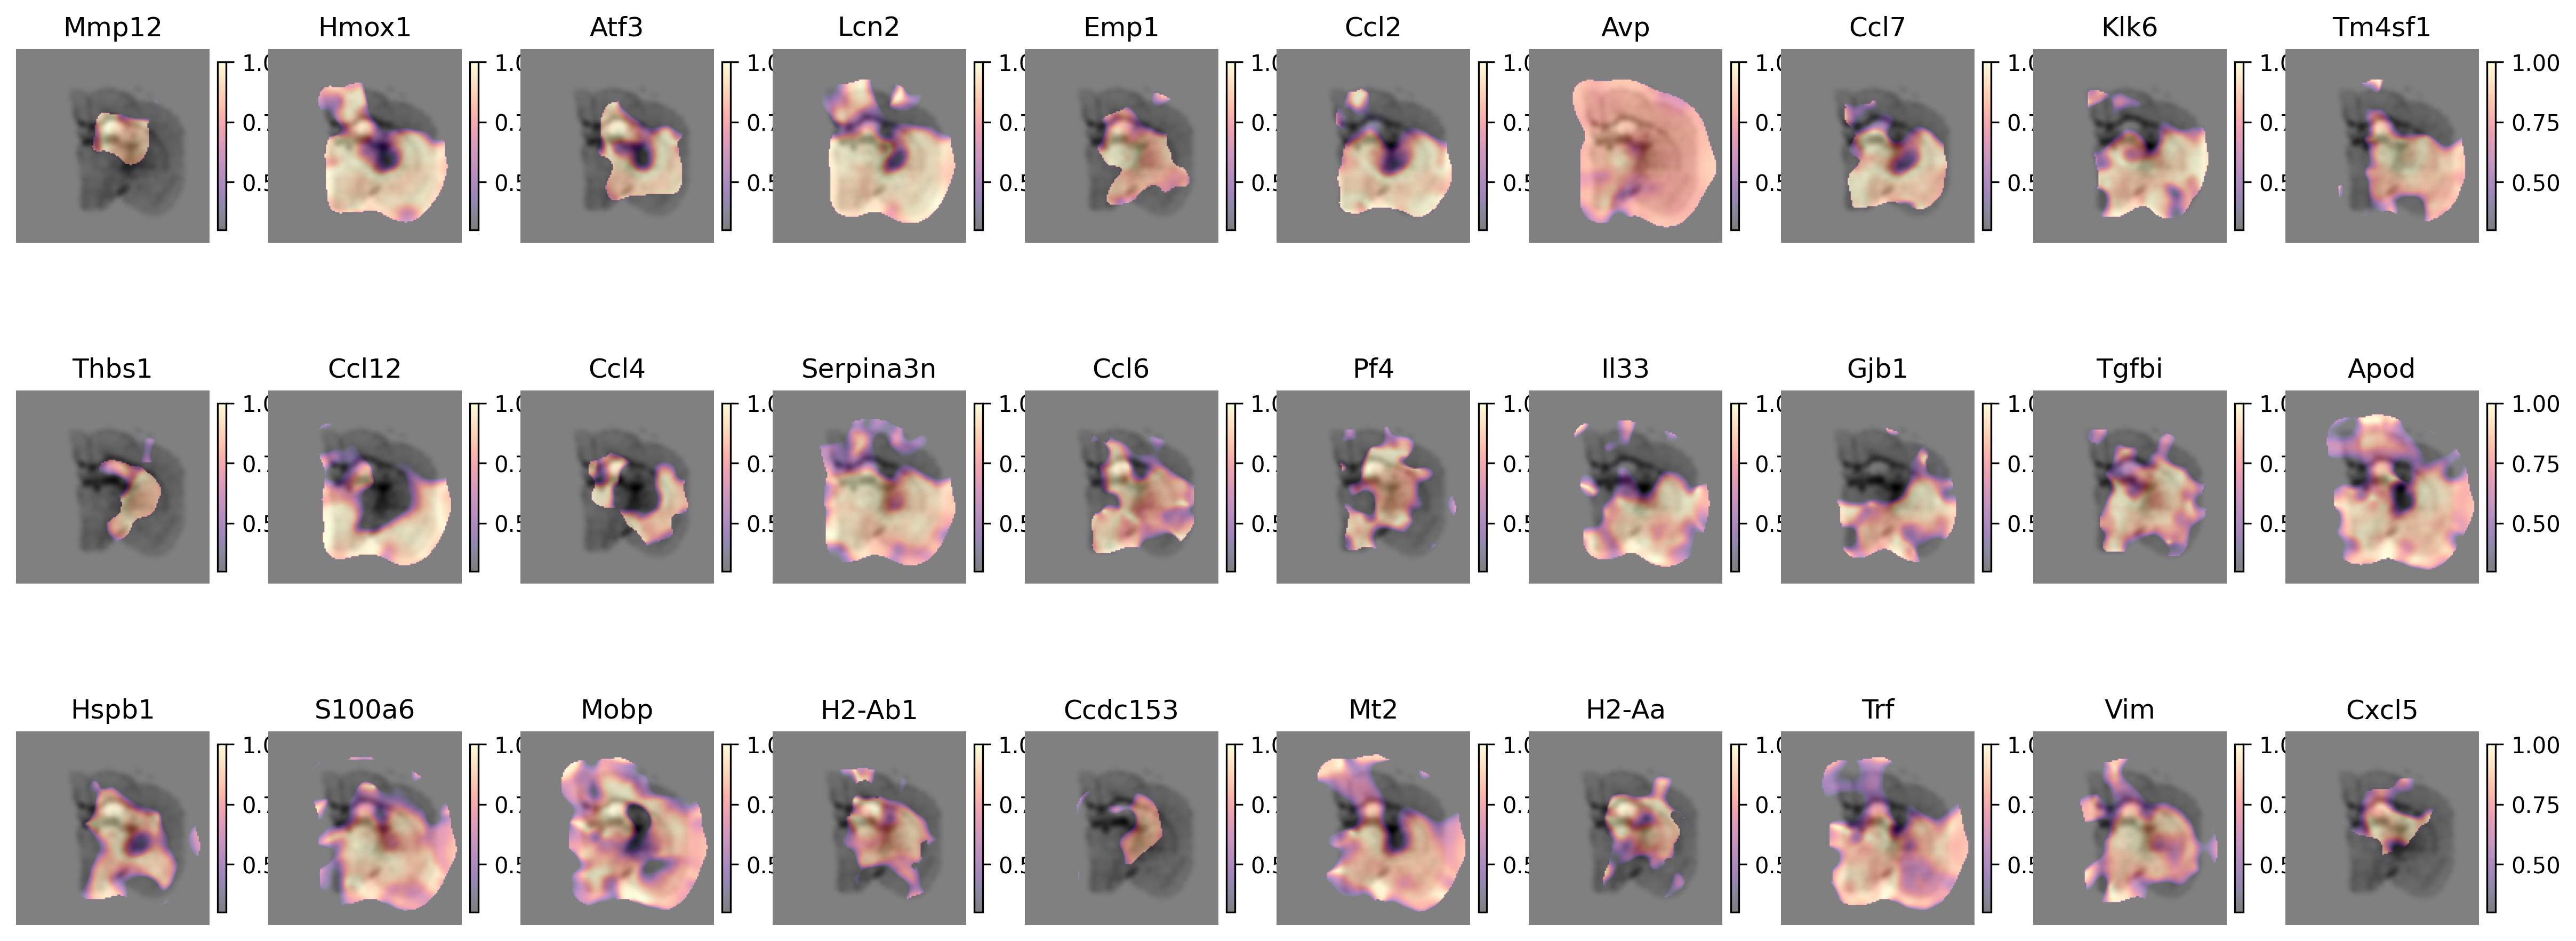

In [11]:
plt.figure(figsize= (20,8), dpi=300)
for i in range(30):
    ii = abs_idx[i]
    plt.subplot(3, 10,i+1)
    plt.imshow(im_alls_s[0], cmap='gray_r',alpha=1)
    plt.imshow(imgs_rmaps[ii],cmap='magma', vmin=0.3, vmax=1.0, alpha=0.5)
    
    plt.title(hvg_sel[ii])
    plt.colorbar(fraction=0.04, pad=0.04)
    plt.axis('off')

In [12]:
hvg_sorted = [hvg_sel[ii] for ii in abs_idx]

In [13]:
print(hvg_sorted[:50])

['Mmp12', 'Hmox1', 'Atf3', 'Lcn2', 'Emp1', 'Ccl2', 'Avp', 'Ccl7', 'Klk6', 'Tm4sf1', 'Thbs1', 'Ccl12', 'Ccl4', 'Serpina3n', 'Ccl6', 'Pf4', 'Il33', 'Gjb1', 'Tgfbi', 'Apod', 'Hspb1', 'S100a6', 'Mobp', 'H2-Ab1', 'Ccdc153', 'Mt2', 'H2-Aa', 'Trf', 'Vim', 'Cxcl5', 'S100a8', 'Dynlrb2', 'Dock1', 'Tagln', 'Gfap', 'Calml4', 'Mgp', 'Cd14', 'Lbp', 'Gm19935', 'Spp1', 'Ifitm3', 'Foxj1', 'S100a9', 'Cd74', 'Lyz2', 'Rsph1', '1110017D15Rik', 'Folr1', 'Ifit1']


In [14]:
!pip freeze > requirements.txt